In [62]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import folium
from folium.plugins import HeatMap

In [38]:
df1 = pd.read_csv(r'C:\Users\Johannes\Documents\Uni\Master\Tech_Labs\ws24-skillswap\DS\data\01_raw\Skillswap_Data_Labeled.csv')

df1.head()

,First_Name,EMail,Age,Gender,Location_Preferences,Latitude,Longitude,Country,City,Languages_Preferred,Last_Seen,Response_Time,Programming_and_Software_Development_off,Project_Management_off,Accounting_and_Finance_off,Marketing_and_Advertising_off,Sales_and_Customer_Service_off,Human_Resources_and_Leadership_off,Graphic_Design_and_Illustration_off,Photography_and_Photo_Editing_off,Music_instruments_Composition_and_Production_off,Writing_and_Editing_off,Arts_and_Crafts_and_DIY_Projects_off,Learning_Foreign_Languages_off,Written_and_Oral_Communication_in_Various_Languages_off,Interpretation_and_Translation_off,Computer_and_Software_Application_Operation_off,Network_Administration_and_IT_Support_off,Electronics_and_Robotics_off,Web_Design_and_Development_off,Data_Analysis_and_Visualization_off,Interpersonal_Communication_off,Conflict_Resolution_and_Mediation_off,Empathy_and_Emotional_Intelligence_off,Leadership_Skills_and_Teamwork_off,Networking_and_Relationship_Management_off,Cooking_and_Baking_off,Gardening_and_Farming_off,DIY_and_Repairs_off,Driving_and_Vehicle_Maintenance_off,First_Aid_and_Life_Saving_Techniques_off,Mathematics_and_Sciences_off,History_and_Social_Sciences_off,Literature_and_Philosophy_off,Research_Methods_and_Academic_Writing_off,Academic_Reading_and_Critique_off,Time_Management_and_Organization_off,Stress_Management_and_Mindfulness_off,Financial_Planning_and_Budgeting_off,Self_Defense_and_Personal_Safety_off,Healthcare_and_Nutrition_off,Count_Programming_and_Software_Development_off,Count_Project_Management_off,Count_Accounting_and_Finance_off,Count_Marketing_and_Advertising_off,Count_Sales_and_Customer_Service_off,Count_Human_Resources_and_Leadership_off,Count_Graphic_Design_and_Illustration_off,Count_Photography_and_Photo_Editing_off,Count_Music_instruments_Composition_and_Production_off,Count_Writing_and_Editing_off,Count_Arts_and_Crafts_and_DIY_Projects_off,Count_Learning_Foreign_Languages_off,Count_Written_and_Oral_Communication_in_Various_Languages_off,Count_Interpretation_and_Translation_off,Count_Computer_and_Software_Application_Operation_off,Count_Network_Administration_and_IT_Support_off,Count_Electronics_and_Robotics_off,Count_Web_Design_and_Development_off,Count_Data_Analysis_and_Visualization_off,Count_Interpersonal_Communication_off,Count_Conflict_Resolution_and_Mediation_off,Count_Empathy_and_Emotional_Intelligence_off,Count_Leadership_Skills_and_Teamwork_off,Count_Networking_and_Relationship_Management_off,Count_Cooking_and_Baking_off,Count_Gardening_and_Farming_off,Count_DIY_and_Repairs_off,Count_Driving_and_Vehicle_Maintenance_off,Count_First_Aid_and_Life_Saving_Techniques_off,Count_Mathematics_and_Sciences_off,Count_History_and_Social_Sciences_off,Count_Literature_and_Philosophy_off,Count_Research_Methods_and_Academic_Writing_off,Count_Academic_Reading_and_Critique_off,Count_Time_Management_and_Organization_off,Count_Stress_Management_and_Mindfulness_off,Count_Financial_Planning_and_Budgeting_off,Count_Self_Defense_and_Personal_Safety_off,Count_Healthcare_and_Nutrition_off,Sum_Skills_Off,Sum_Skills_Rec,Professional_Skills,Creative_Skills,Language_Skills,Technical_Skills,Social_Skills,Practical_Skills,Academic_Skills,Life_Skills,Usability,Speed_Performance,Feature_Satisfaction,Security_Satisfaction,Customer_Support,Activity_Status
0,Łukasz,łukasz.sezgin@gmx.de,25,Female,Local or Remote,52,14,Germany,Berlin,"['German', 'Portuguese', 'Russian', 'Mandarin ...",Recently,Within a week,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Novice,Beginner,Advanced,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Beginner,Intermediate,Novice,Beginner,Expert,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20,20,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20,Very Satisfied,Dissatisfied,Very Satisfied,Very Dissatisfied,Dissatisfied,Swapper
1,Bianca,bianca.herrmann@icloud.com,25,Male,Remote O

# 1. General info on data set

In [39]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Columns: 106 entries, First_Name to Activity_Status
dtypes: float64(51), int64(1), object(54)
memory usage: 621.2+ KB


In [40]:
pd.set_option('display.float_format', lambda x: '%.0f' % x)
df_describe = df1.drop(columns=['Latitude', 'Longitude'])
df_describe.describe().astype(int)

,Age,Count_Programming_and_Software_Development_off,Count_Project_Management_off,Count_Accounting_and_Finance_off,Count_Marketing_and_Advertising_off,Count_Sales_and_Customer_Service_off,Count_Human_Resources_and_Leadership_off,Count_Graphic_Design_and_Illustration_off,Count_Photography_and_Photo_Editing_off,Count_Music_instruments_Composition_and_Production_off,Count_Writing_and_Editing_off,Count_Arts_and_Crafts_and_DIY_Projects_off,Count_Learning_Foreign_Languages_off,Count_Written_and_Oral_Communication_in_Various_Languages_off,Count_Interpretation_and_Translation_off,Count_Computer_and_Software_Application_Operation_off,Count_Network_Administration_and_IT_Support_off,Count_Electronics_and_Robotics_off,Count_Web_Design_and_Development_off,Count_Data_Analysis_and_Visualization_off,Count_Interpersonal_Communication_off,Count_Conflict_Resolution_and_Mediation_off,Count_Empathy_and_Emotional_Intelligence_off,Count_Leadership_Skills_and_Teamwork_off,Count_Networking_and_Relationship_Management_off,Count_Cooking_and_Baking_off,Count_Gardening_and_Farming_off,Count_DIY_and_Repairs_off,Count_Driving_and_Vehicle_Maintenance_off,Count_First_Aid_and_Life_Saving_Techniques_off,Count_Mathematics_and_Sciences_off,Count_History_and_Social_Sciences_off,Count_Literature_and_Philosophy_off,Count_Research_Methods_and_Academic_Writing_off,Count_Academic_Reading_and_Critique_off,Count_Time_Management_and_Organization_off,Count_Stress_Management_and_Mindfulness_off,Count_Financial_Planning_and_Budgeting_off,Count_Self_Defense_and_Personal_Safety_off,Count_Healthcare_and_Nutrition_off,Sum_Skills_Off,Sum_Skills_Rec,Professional_Skills,Creative_Skills,Language_Skills,Technical_Skills,Social_Skills,Practical_Skills,Academic_Skills,Life_Skills
count,750,18,16,12,20,17,23,19,20,18,17,14,31,26,12,23,21,26,13,23,17,16,21,15,25,15,19,22,17,21,24,22,16,23,16,19,24,16,10,23,750,750,106,88,69,106,94,94,101,92
mean,26,12,15,16,15,13,11,12,14,11,11,7,11,11,8,8,11,8,12,8,13,8,11,16,10,8,8,10,10,11,14,9,14,12,10,9,10,12,10,8,11,11,13,11,11,9,11,9,12,10
std,2,8,9,13,9,7,8,9,7,7,7,6,9,9,10,7,9,7,10,9,9,10,10,8,7,8,7,7,9,9,7,8,9,8,10,7,5,9,9,8,8,9,9,7,9,8,9,8,8,7
min,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
25%,25,5,8,9,7,7,5,7,9,5,10,2,5,6,0,0,5,2,7,0,9,0,0,12,6,1,2,7,2,3,9,3,8,6,0,1,7,3,4,0,4,4,7,5,5,1,3,2,5,3
50%,27,12,15,11,15,14,10,13,13,11,13,4,10,10,4,7,9,8,9,6,13,3,11,18,10,4,9,10,7,9,13,8,14,13,5,10,11,15,8,7,11,10,13,12,9,7,12,9,12,10
75%,28,18,19,26,24,19,17,16,19,17,16,11,17,13,15,15,19,14,15,12,16,16,19,23,15,14,14,12,17,18,18,14,19,16,16,15,12,19,15,17,17,18,20,16,17,15,18,16,17,16
max,32,31,33,43,29,25,28,34,28,24,26,22,35,32,26,23,31,22,31,26,38,27,34,30,25,27,22,31,27,34,32,34,33,31,32,20,20,27,26,24,43,36,43,34,35,31,38,34,34,27


In [41]:
pd.set_option('display.max_rows', None)
null_counts = df1.isnull().sum()
null_counts_df = pd.DataFrame(null_counts, columns=['Null Count'])
null_counts_df_transposed = null_counts_df.transpose()
null_counts_df_transposed

,First_Name,EMail,Age,Gender,Location_Preferences,Latitude,Longitude,Country,City,Languages_Preferred,Last_Seen,Response_Time,Programming_and_Software_Development_off,Project_Management_off,Accounting_and_Finance_off,Marketing_and_Advertising_off,Sales_and_Customer_Service_off,Human_Resources_and_Leadership_off,Graphic_Design_and_Illustration_off,Photography_and_Photo_Editing_off,Music_instruments_Composition_and_Production_off,Writing_and_Editing_off,Arts_and_Crafts_and_DIY_Projects_off,Learning_Foreign_Languages_off,Written_and_Oral_Communication_in_Various_Languages_off,Interpretation_and_Translation_off,Computer_and_Software_Application_Operation_off,Network_Administration_and_IT_Support_off,Electronics_and_Robotics_off,Web_Design_and_Development_off,Data_Analysis_and_Visualization_off,Interpersonal_Communication_off,Conflict_Resolution_and_Mediation_off,Empathy_and_Emotional_Intelligence_off,Leadership_Skills_and_Teamwork_off,Networking_and_Relationship_Management_off,Cooking_and_Baking_off,Gardening_and_Farming_off,DIY_and_Repairs_off,Driving_and_Vehicle_Maintenance_off,First_Aid_and_Life_Saving_Techniques_off,Mathematics_and_Sciences_off,History_and_Social_Sciences_off,Literature_and_Philosophy_off,Research_Methods_and_Academic_Writing_off,Academic_Reading_and_Critique_off,Time_Management_and_Organization_off,Stress_Management_and_Mindfulness_off,Financial_Planning_and_Budgeting_off,Self_Defense_and_Personal_Safety_off,Healthcare_and_Nutrition_off,Count_Programming_and_Software_Development_off,Count_Project_Management_off,Count_Accounting_and_Finance_off,Count_Marketing_and_Advertising_off,Count_Sales_and_Customer_Service_off,Count_Human_Resources_and_Leadership_off,Count_Graphic_Design_and_Illustration_off,Count_Photography_and_Photo_Editing_off,Count_Music_instruments_Composition_and_Production_off,Count_Writing_and_Editing_off,Count_Arts_and_Crafts_and_DIY_Projects_off,Count_Learning_Foreign_Languages_off,Count_Written_and_Oral_Communication_in_Various_Languages_off,Count_Interpretation_and_Translation_off,Count_Computer_and_Software_Application_Operation_off,Count_Network_Administration_and_IT_Support_off,Count_Electronics_and_Robotics_off,Count_Web_Design_and_Development_off,Count_Data_Analysis_and_Visualization_off,Count_Interpersonal_Communication_off,Count_Conflict_Resolution_and_Mediation_off,Count_Empathy_and_Emotional_Intelligence_off,Count_Leadership_Skills_and_Teamwork_off,Count_Networking_and_Relationship_Management_off,Count_Cooking_and_Baking_off,Count_Gardening_and_Farming_off,Count_DIY_and_Repairs_off,Count_Driving_and_Vehicle_Maintenance_off,Count_First_Aid_and_Life_Saving_Techniques_off,Count_Mathematics_and_Sciences_off,Count_History_and_Social_Sciences_off,Count_Literature_and_Philosophy_off,Count_Research_Methods_and_Academic_Writing_off,Count_Academic_Reading_and_Critique_off,Count_Time_Management_and_Organization_off,Count_Stress_Management_and_Mindfulness_off,Count_Financial_Planning_and_Budgeting_off,Count_Self_Defense_and_Personal_Safety_off,Count_Healthcare_and_Nutrition_off,Sum_Skills_Off,Sum_Skills_Rec,Professional_Skills,Creative_Skills,Language_Skills,Technical_Skills,Social_Skills,Practical_Skills,Academic_Skills,Life_Skills,Usability,Speed_Performance,Feature_Satisfaction,Security_Satisfaction,Customer_Support,Activity_Status
Null Count,0,0,0,0,0,0,0,0,0,0,0,0,561,561,561,561,561,561,577,577,577,577,577,581,581,581,549,549,549,549,549,564,564,564,564,564,554,554,554,554,554,576,576,576,576,576,548,548,548,548,548,732,734,738,730,733,727,731,730,732,733,736,719,724,738,727,729,724,737,727,733,734,729,735,725,735,731,728,733,729,726,728,734,727,734,731,726,734,740,727,0,0,644,662,681,644,656,656,649,658,0,0,0,0,0,0


In [42]:
pd.set_option('display.max_columns', None)
unique_counts = df1.nunique()
unique_counts_df = pd.DataFrame(unique_counts, columns=['Unique Count'])
unique_counts_df_transposed = unique_counts_df.transpose()
unique_counts_df_transposed


,First_Name,EMail,Age,Gender,Location_Preferences,Latitude,Longitude,Country,City,Languages_Preferred,Last_Seen,Response_Time,Programming_and_Software_Development_off,Project_Management_off,Accounting_and_Finance_off,Marketing_and_Advertising_off,Sales_and_Customer_Service_off,Human_Resources_and_Leadership_off,Graphic_Design_and_Illustration_off,Photography_and_Photo_Editing_off,Music_instruments_Composition_and_Production_off,Writing_and_Editing_off,Arts_and_Crafts_and_DIY_Projects_off,Learning_Foreign_Languages_off,Written_and_Oral_Communication_in_Various_Languages_off,Interpretation_and_Translation_off,Computer_and_Software_Application_Operation_off,Network_Administration_and_IT_Support_off,Electronics_and_Robotics_off,Web_Design_and_Development_off,Data_Analysis_and_Visualization_off,Interpersonal_Communication_off,Conflict_Resolution_and_Mediation_off,Empathy_and_Emotional_Intelligence_off,Leadership_Skills_and_Teamwork_off,Networking_and_Relationship_Management_off,Cooking_and_Baking_off,Gardening_and_Farming_off,DIY_and_Repairs_off,Driving_and_Vehicle_Maintenance_off,First_Aid_and_Life_Saving_Techniques_off,Mathematics_and_Sciences_off,History_and_Social_Sciences_off,Literature_and_Philosophy_off,Research_Methods_and_Academic_Writing_off,Academic_Reading_and_Critique_off,Time_Management_and_Organization_off,Stress_Management_and_Mindfulness_off,Financial_Planning_and_Budgeting_off,Self_Defense_and_Personal_Safety_off,Healthcare_and_Nutrition_off,Count_Programming_and_Software_Development_off,Count_Project_Management_off,Count_Accounting_and_Finance_off,Count_Marketing_and_Advertising_off,Count_Sales_and_Customer_Service_off,Count_Human_Resources_and_Leadership_off,Count_Graphic_Design_and_Illustration_off,Count_Photography_and_Photo_Editing_off,Count_Music_instruments_Composition_and_Production_off,Count_Writing_and_Editing_off,Count_Arts_and_Crafts_and_DIY_Projects_off,Count_Learning_Foreign_Languages_off,Count_Written_and_Oral_Communication_in_Various_Languages_off,Count_Interpretation_and_Translation_off,Count_Computer_and_Software_Application_Operation_off,Count_Network_Administration_and_IT_Support_off,Count_Electronics_and_Robotics_off,Count_Web_Design_and_Development_off,Count_Data_Analysis_and_Visualization_off,Count_Interpersonal_Communication_off,Count_Conflict_Resolution_and_Mediation_off,Count_Empathy_and_Emotional_Intelligence_off,Count_Leadership_Skills_and_Teamwork_off,Count_Networking_and_Relationship_Management_off,Count_Cooking_and_Baking_off,Count_Gardening_and_Farming_off,Count_DIY_and_Repairs_off,Count_Driving_and_Vehicle_Maintenance_off,Count_First_Aid_and_Life_Saving_Techniques_off,Count_Mathematics_and_Sciences_off,Count_History_and_Social_Sciences_off,Count_Literature_and_Philosophy_off,Count_Research_Methods_and_Academic_Writing_off,Count_Academic_Reading_and_Critique_off,Count_Time_Management_and_Organization_off,Count_Stress_Management_and_Mindfulness_off,Count_Financial_Planning_and_Budgeting_off,Count_Self_Defense_and_Personal_Safety_off,Count_Healthcare_and_Nutrition_off,Sum_Skills_Off,Sum_Skills_Rec,Professional_Skills,Creative_Skills,Language_Skills,Technical_Skills,Social_Skills,Practical_Skills,Academic_Skills,Life_Skills,Usability,Speed_Performance,Feature_Satisfaction,Security_Satisfaction,Customer_Support,Activity_Status
Unique Count,636,750,12,4,3,750,750,1,1,561,6,4,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,15,13,8,17,11,15,13,14,13,13,9,19,14,7,13,15,16,10,14,13,9,11,13,17,11,13,13,13,14,17,14,15,15,11,12,13,12,8,15,38,37,33,26,26,27,33,27,30,27,5,5,5,5,5,4


# 2. Demographics & Locations

## 2.1 Gender Split

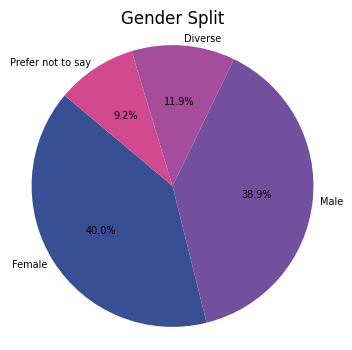

In [43]:
gender_counts = df1['Gender'].value_counts()
labels = gender_counts.index
sizes = gender_counts.values

plt.figure(figsize=(4, 4))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors = ['#384f94', '#72509e', '#a54d9d', '#d14a8f'], textprops={'fontsize': 7}, labeldistance=1.05)
plt.title('Gender Split', fontsize=12)
plt.axis('equal')  
plt.show()

## 2.2 Age Distribution

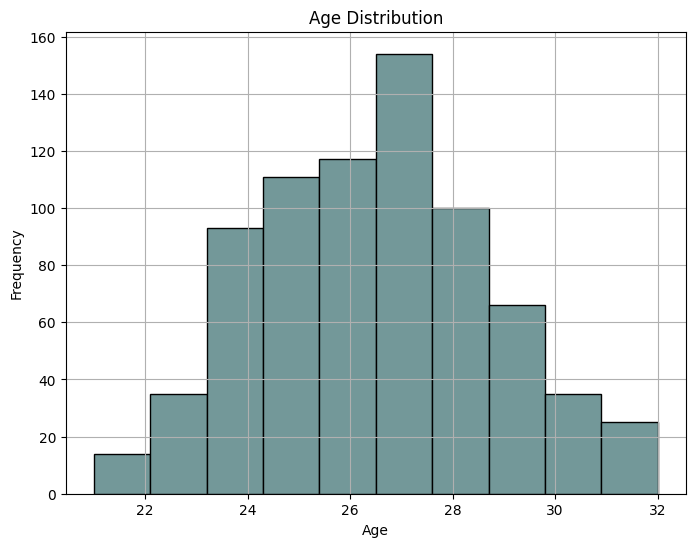

In [44]:
plt.figure(figsize=(8, 6))
plt.hist(df1['Age'], bins=10, color='#739899', edgecolor='black') 
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


## 2.3 Age distribution by gender

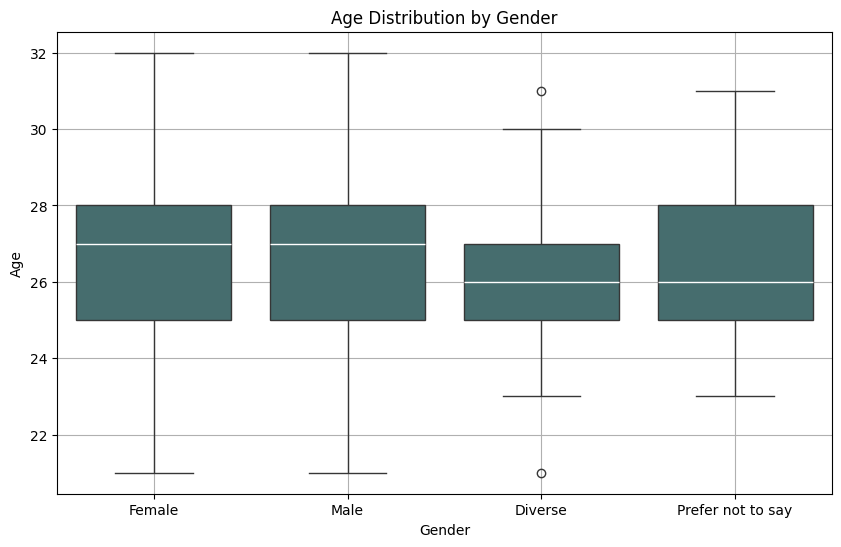

In [45]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Age', data=df1, color='#407374',  medianprops={'color': 'white'})
plt.title('Age Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.grid(True)
plt.show()

## 2.4 User locations

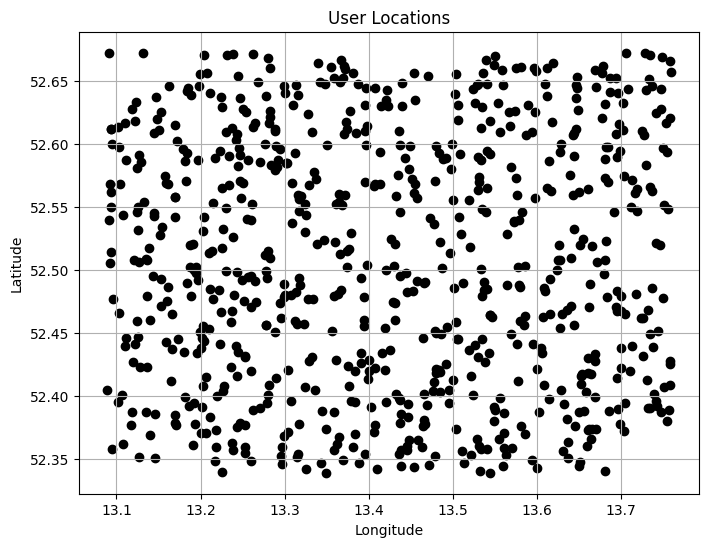

In [46]:
coordinates = [(lat, lon) for lat, lon in zip(df1['Latitude'], df1['Longitude'])]

lats, lons = zip(*coordinates)

plt.figure(figsize=(8, 6))
plt.scatter(lons, lats, color='black', marker='o')  
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('User Locations')
plt.grid(True)
plt.show()

In [65]:
map_berlin = folium.Map(location=[52.52, 13.4050], zoom_start=10)

coordinates = df1[['Latitude', 'Longitude']].values.tolist()
heat_map = HeatMap(coordinates, radius=12)  
heat_map.add_to(map_berlin)

map_berlin

# 3. Teaching and learning ambitions

## 3.1 Top 3 most taught skill domains by gender (highlighted)

In [48]:
skill_domains = [
    "Professional_Skills",
    "Creative_Skills",
    "Language_Skills",
    "Technical_Skills",
    "Social_Skills",
    "Practical_Skills",
    "Academic_Skills",
    "Life_Skills"
]

gender_counts = {}

for skill_domain in skill_domains:
    counts = df1.groupby('Gender')[skill_domain].sum()
    gender_counts[skill_domain] = counts

gender_skill_counts_df = pd.DataFrame(gender_counts)

order = ["Female", "Male", "Diverse", "Prefer not to say"]
gender_skill_counts_df = gender_skill_counts_df.reindex(order)

gender_skill_counts_df = gender_skill_counts_df.transpose().astype(int)

def highlight_max_second_max_third_max(s):
    max_val = s.max()
    second_max_val = s.nlargest(2).min()
    third_max_val = s.nlargest(3).min()
    is_max = s == max_val
    is_second_max = s == second_max_val
    is_third_max = s == third_max_val
    colors = ['#003030' if v else '' for v in is_max]
    colors = ['#407374' if v else color for v, color in zip(is_second_max, colors)]
    colors = ['#739899' if v else color for v, color in zip(is_third_max, colors)]
    return ['background-color: %s' % color for color in colors]

styled_gender_skill_counts_df = gender_skill_counts_df.style.apply(highlight_max_second_max_third_max)

styled_gender_skill_counts_df

Gender,Female,Male,Diverse,Prefer not to say
Professional_Skills,761,341,217,134
Creative_Skills,296,527,60,148
Language_Skills,300,388,41,38
Technical_Skills,381,318,186,128
Social_Skills,404,459,176,83
Practical_Skills,301,415,100,97
Academic_Skills,605,425,105,100
Life_Skills,348,344,127,120


## 3.2 (Some of) Top 10 Teachers 

In [49]:
df1["Sum_Skills_Off"] = df1["Sum_Skills_Off"].astype(int)
df_teachers = df1.rename(columns={"First_Name": "Name", "Sum_Skills_Off": "Lessons taught"})
df_teachers.sort_values(by="Lessons taught", ascending=False)[["Name", "Lessons taught"]].head(10)


,Name,Lessons taught
720,Carlota,43
63,Guilherme,38
363,Colette,35
435,Lucas,34
670,Maksur,34
169,Marianela,34
637,Jeremi,34
127,Karina,33
520,Cyprian,33
196,Adelasia,32


## 3.3 (Some of) Top 10 Learners

In [50]:
df1["Sum_Skills_Rec"] = df1["Sum_Skills_Rec"].astype(int)
df_learners = df1.rename(columns={"First_Name": "Name", "Sum_Skills_Rec": "Lessons received"})
df_learners.sort_values(by="Lessons received", ascending=False)[["Name", "Lessons received"]].head(10)

,Name,Lessons received
89,Joel,36
363,Colette,36
547,Rosie,36
61,Ünal,36
720,Carlota,36
435,Lucas,36
607,Alphonse,35
725,Javi,35
591,Elhan,35
297,Lara,35


## 3.4 Comparison distribution of learning and teaching 

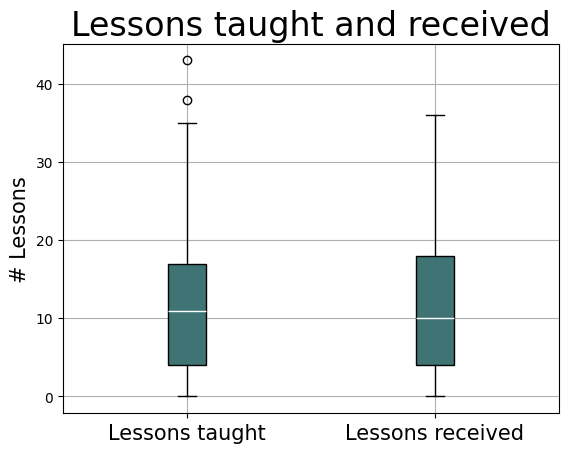

In [51]:

df_skills = df1.rename(columns={"Sum_Skills_Off": "Lessons taught", "Sum_Skills_Rec": "Lessons received"})

boxplot = df_skills.boxplot(column=['Lessons taught', 'Lessons received'], 
                    patch_artist=True,
                    boxprops={'facecolor': '#407374', 'edgecolor': 'black'},
                    whiskerprops={'color': 'black'},
                    medianprops={'color': 'white'})

plt.title('Lessons taught and received', fontsize = 24)
plt.xlabel('')
plt.ylabel('# Lessons', fontsize = 15)
plt.xticks(fontsize=15)

plt.show()


## 3.5 Teaching and Learning across genders

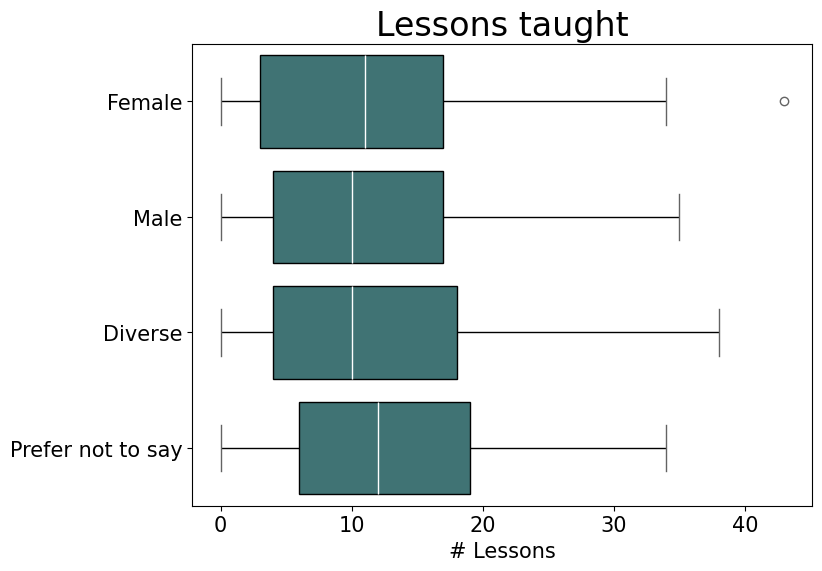

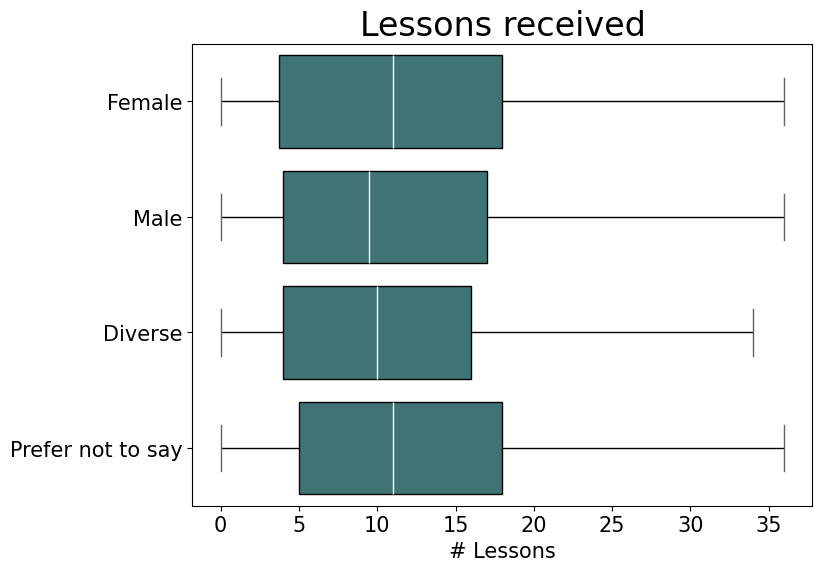

In [52]:
plt.figure(figsize=(8, 6))
sns.boxplot(y='Gender', x='Sum_Skills_Off', data=df1, color="#82c7a5", 
            patch_artist=True,
                    boxprops={'facecolor': '#407374', 'edgecolor': 'black'},
                    whiskerprops={'color': 'black'},
                    medianprops={'color': 'white'})
plt.title('Lessons taught', fontsize = 24)
plt.xlabel('# Lessons', fontsize = 15)
plt.ylabel('',fontsize = 15)

plt.yticks(fontsize=15)

plt.xticks(fontsize=15)
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(y='Gender', x='Sum_Skills_Rec', data=df1, color="#82c7a5", 
            patch_artist=True,
                    boxprops={'facecolor': '#407374', 'edgecolor': 'black'},
                    whiskerprops={'color': 'black'},
                    medianprops={'color': 'white'})
plt.title('Lessons received', fontsize = 24)
plt.xlabel('# Lessons', fontsize = 15)
plt.ylabel('',fontsize = 15)

plt.yticks(fontsize=15)

plt.xticks(fontsize=15)
plt.show()

## 3.6 Top 3 most demanded (taught) skills

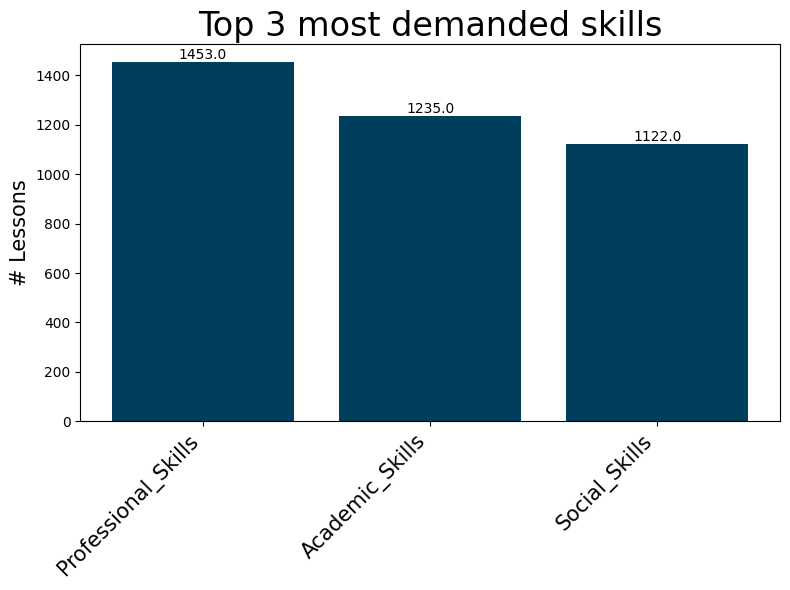

In [53]:
sums = {}
for skill_domain in skill_domains:
    sums[skill_domain] = df1[skill_domain].sum()

top_3 = sorted(sums.items(), key=lambda x: x[1], reverse=True)[:3]

top_3_skills = [item[0] for item in top_3]
top_3_values = [item[1] for item in top_3]

plt.figure(figsize=(8, 6))
plt.bar(top_3_skills, top_3_values, color='#003f5c')

plt.ylabel('# Lessons', fontsize = 15)
plt.title('Top 3 most demanded skills', fontsize = 24)

for i, value in enumerate(top_3_values):
    plt.text(i, value, str(value), ha='center', va='bottom')

plt.xticks(rotation=45, ha='right', fontsize=15)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

## 3.7 Do people teach more life skills with increasing age?

### Result: no meaningful linear relationship between the variables

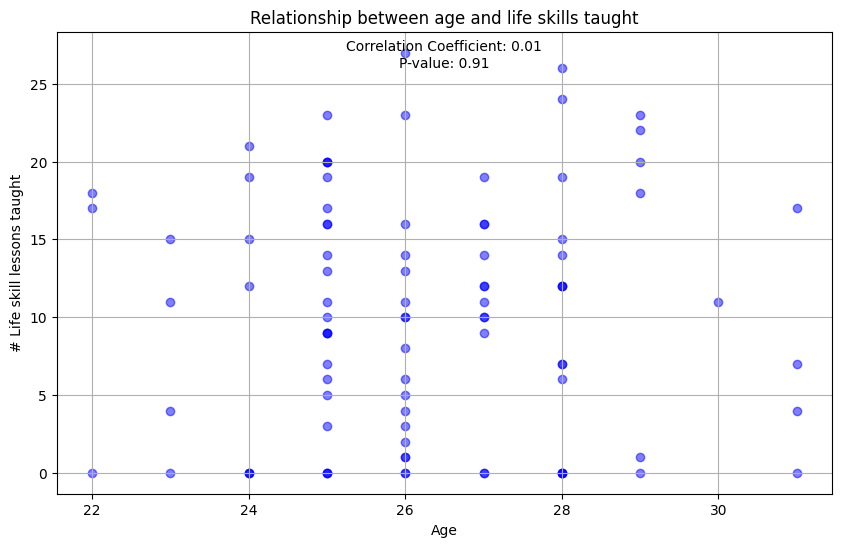

In [54]:
df_cleaned = df1.dropna(subset=['Age', 'Life_Skills'])

ages = df_cleaned['Age']
life_skills = df_cleaned['Life_Skills']

plt.figure(figsize=(10, 6))
plt.scatter(ages, life_skills, color='blue', alpha=0.5)  
plt.title('Relationship between age and life skills taught')
plt.xlabel('Age')
plt.ylabel('# Life skill lessons taught')
plt.grid(True)  


correlation_coef, p_value = stats.pearsonr(ages, life_skills)
plt.text(0.5, 0.95, f'Correlation Coefficient: {correlation_coef:.2f}\nP-value: {p_value:.2f}', 
         horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)

plt.show()


# 4. Platform Experience / Happiness

## 4.1 Rating across feedback categories 

In [55]:
rating_options = [
    "Very Dissatisfied",
    "Dissatisfied",
    "Neutral or Average",
    "Satisfied",
    "Very Satisfied"
]

counts_dict = {}

for column in df1.columns:
    column_counts = df1[column].value_counts()
    counts_dict[column] = {option: column_counts.get(option, 0) for option in rating_options}

counts_df = pd.DataFrame(counts_dict)

counts_df = counts_df.transpose()
rows_to_select = ['Usability', 'Speed_Performance', 'Feature_Satisfaction', 'Security_Satisfaction', 'Customer_Support']
filtered_df = counts_df.loc[rows_to_select]
filtered_df

,Very Dissatisfied,Dissatisfied,Neutral or Average,Satisfied,Very Satisfied
Usability,60,138,210,193,149
Speed_Performance,76,148,201,188,137
Feature_Satisfaction,75,146,196,191,142
Security_Satisfaction,63,153,215,191,128
Customer_Support,60,151,195,190,154


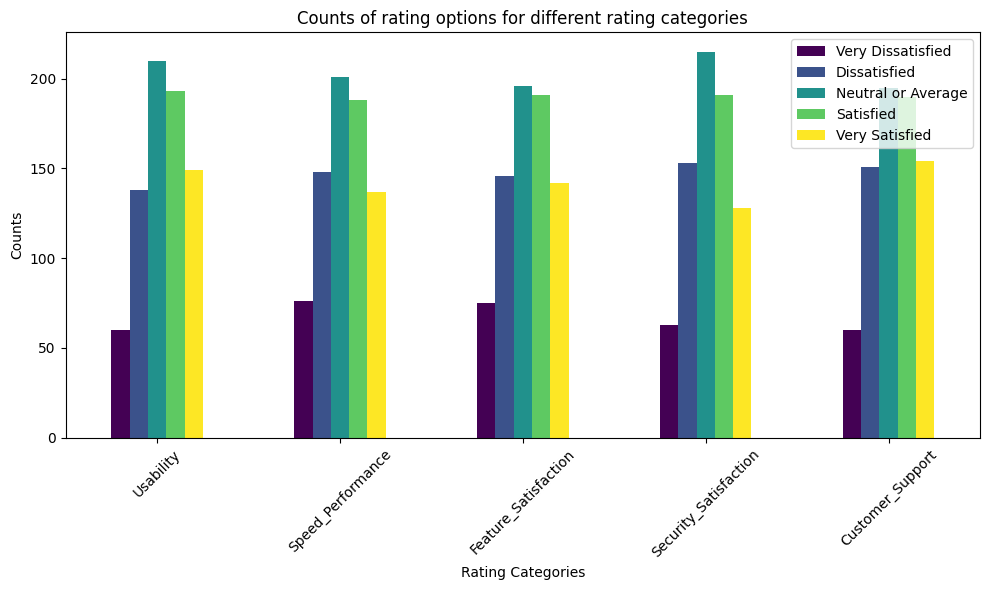

In [56]:
filtered_df.plot(kind='bar', figsize=(10, 6), colormap='viridis')

plt.title('Counts of rating options for different rating categories')
plt.xlabel('Rating Categories')
plt.ylabel('Counts')
plt.xticks(rotation=45)  

plt.tight_layout()
plt.show()